In [48]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:

def resize_image(input_path, output_path, target_width, target_height):
    img = cv2.open(input_path)
    img_resized = cv2.resize((target_width, target_height), Image.ANTIALIAS)
    img_resized.save(output_path)
    return img 
input_image_path = "raw_data/picture.tif"
output_image_path = "raw_data/resized_picture.tif"
target_width, target_height = 8000, 12300
resize_image(input_image_path, output_image_path, target_width, target_height)


In [26]:

def create_bounding_box(x, y, half_side_km=5):
    """
    Creates a bounding box around a given point (x, y) that forms a square with a specified half-side length in kilometers.
    
    Args:
        x (float): x-coordinate (longitude)
        y (float): y-coordinate (latitude)
        half_side_km (float): Half of the side length of the square in kilometers (default is 5 km)
    
    Returns:
        tuple: (NE_latitude, NE_longitude, SW_latitude, SW_longitude)
    """
    # Convert half-side length from km to degrees (approximate)
    km_to_deg = 1 / 111.32  # 1 degree of latitude is approximately 111.32 km
    
    # Calculate NE and SW coordinates
    NE_latitude = y + half_side_km * km_to_deg
    NE_longitude = x + half_side_km * km_to_deg
    SW_latitude = y - half_side_km * km_to_deg
    SW_longitude = x - half_side_km * km_to_deg
    
    return NE_latitude, NE_longitude, SW_latitude, SW_longitude

def create_image_for_cluster(cluster_lat, cluster_lon, half_side_km=5, tif_image_path="picture.tif"):
    """
    Creates an image for a cluster around a given point (latitude, longitude) using a bounding box.
    
    Args:
        cluster_lat (float): Latitude of the cluster center
        cluster_lon (float): Longitude of the cluster center
        half_side_km (float): Half of the side length of the bounding box in kilometers (default is 5 km)
        tif_image_path (str): Path to the TIF image (default is "picture.tif")
    """
    # Calculate bounding box coordinates
    NE_lat, NE_lon, SW_lat, SW_lon = create_bounding_box(cluster_lon, cluster_lat, half_side_km)
    
    # Load the TIF image
    tif_image = cv2.imread("raw_data/picture.tif", flags=(cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH))
    # flag lets cv2 open a 32-bit image, normally only allowed 8-bit 
    
    # Calculate pixel coordinates for the bounding box
    tif_width, tif_height = tif_image.shape
    NE_x = int((NE_lon + 180) * (tif_width / 360))
    NE_y = int((90 - NE_lat) * (tif_height / 180))
    SW_x = int((SW_lon + 180) * (tif_width / 360))
    SW_y = int((90 - SW_lat) * (tif_height / 180))
   
    return tif_image, tif_image.shape, NE_x, NE_y, SW_x, SW_y

In [17]:
create_bounding_box(51.509865, -0.118092, half_side_km=5)

(-0.07317644125044916,
 51.55478055874955,
 -0.16300755874955086,
 51.46494944125045)

In [27]:
tif_image, tif_image.shape, NE_x, NE_y, SW_x, SW_y = create_image_for_cluster(51.509865, -0.118092, half_side_km=5, tif_image_path="raw_data/picture.tif")

In [36]:
create_image_for_cluster(51.509865, -0.118092, half_side_km=5, tif_image_path="raw_data/picture.tif")

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 (18000, 28800),
 8996,
 6151,
 8991,
 6165)

In [35]:
tif_image.shape

(18000, 28800)

In [41]:
np.unique(tif_image)

array([-1.8838821e-02, -1.8290501e-02, -1.8194554e-02, ...,
        5.2969105e+04,  5.7591078e+04,  9.2682273e+04], dtype=float32)

In [37]:
cropped_image = tif_image[NE_y:SW_y, SW_x:NE_x]

In [ ]:
6165:6151 , 8991:8996

In [38]:
cropped_image.shape

(14, 5)

In [39]:
np.save("cluster_london.npy", cropped_image)

In [44]:
cluster_london = np.load("cluster_london.npy")

In [45]:
cluster_london.shape

(14, 5)

In [49]:
tf.expand_dims(cluster_london, axis=-1).shape

TensorShape([14, 5, 1])

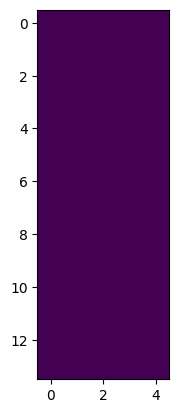

In [51]:
plt.imshow(cluster_london)

In [ ]:
    # Crop the TIF image to the bounding box
    cropped_image = tif_image.crop((SW_x, SW_y, NE_x, NE_y))
    
    # Save the cropped image
    cropped_image.save(f"cluster_{cluster_lat}_{cluster_lon}.png")
    print(f"Image for cluster ({cluster_lat}, {cluster_lon}) saved as cluster_{cluster_lat}_{cluster_lon}.png")

# Example usage: Create an image for a cluster around Vancouver, BC
london_latitude = 51.509865
london_longitude = -0.118092
create_image_for_cluster(london_latitude, london_longitude, half_side_km=5)
